In [ ]:
# import libraries

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import math

In [63]:
# Database
start = "2005-01-01"
end   = "2025-12-31"

us_tech = ['AAPL','MSFT','GOOGL','AMZN','META','NVDA','AVGO','TSLA','ORCL','INTC']
eu_energy = ['SHEL.L','BP.L','TTE.PA','ENI.MI','EQNR.OL','REP.MC','PKN.WA','OMV.VI','RWE.DE','ENGI.PA']

tickers = us_tech + eu_energy
sectors = (["US Tech"]*len(us_tech)) + (["EU Energy"]*len(eu_energy))

def get_data(tickers, start, end):
    raw = yf.download(tickers, start=start, end=end, auto_adjust=False, progress=False)['Close']
    raw = raw.dropna()
    return raw


data = get_data(tickers, start, end)
print(data.shape)
display(data.head())

(3144, 20)


Ticker,AAPL,AMZN,AVGO,BP.L,ENGI.PA,ENI.MI,EQNR.OL,GOOGL,INTC,META,MSFT,NVDA,OMV.VI,ORCL,PKN.WA,REP.MC,RWE.DE,SHEL.L,TSLA,TTE.PA
Date,,,,,,,,,,,,,,,,,,,,
2012-05-18,18.94,10.69,3.00,391.95,16.24,15.93,138.30,15.03,26.07,38.23,29.27,0.30,22.10,25.61,33.70,13.68,29.99,1982.00,1.84,34.65
2012-05-21,20.05,10.91,3.09,395.60,16.20,15.37,139.10,15.37,26.15,34.03,29.75,0.31,22.75,26.26,34.19,13.49,29.73,1983.50,1.92,34.58
2012-05-22,19.89,10.77,3.13,401.95,16.48,15.90,140.00,15.04,26.03,31.00,29.76,0.30,23.05,26.36,34.51,13.77,30.50,2020.00,2.05,35.15
2012-05-23,20.38,10.86,3.35,393.90,16.07,15.34,136.50,15.25,25.44,32.00,29.11,0.31,22.50,26.68,33.65,13.35,29.34,1970.50,2.07,34.49
2012-05-24,20.19,10.76,3.25,407.00,16.43,15.72,138.90,15.11,25.65,33.03,29.07,0.30,22.72,26.12,33.85,13.80,29.99,2013.00,2.02,35.00


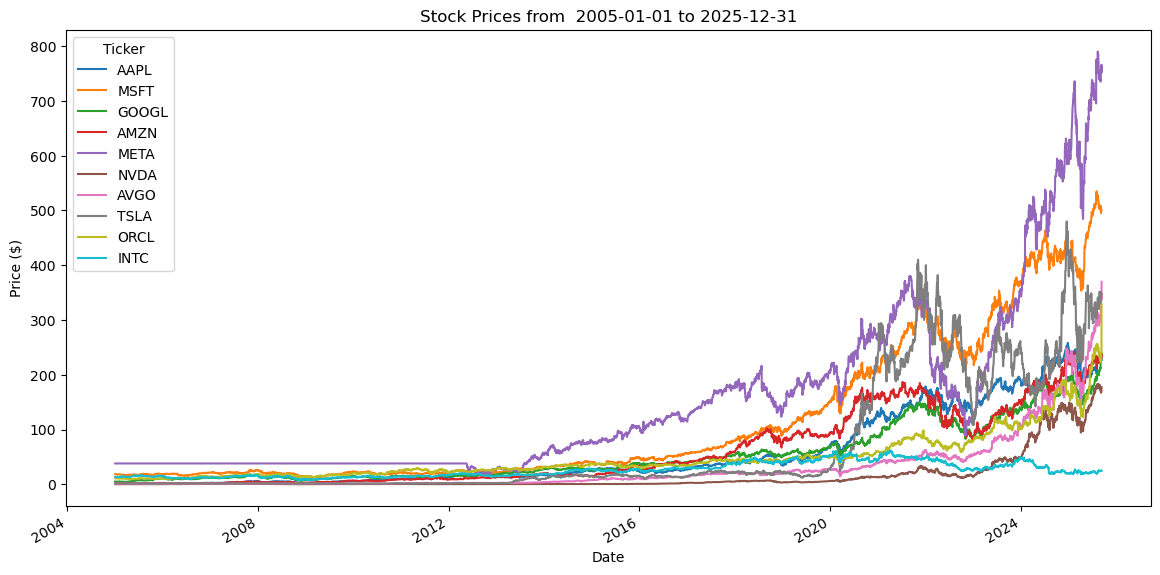

In [40]:
data[us_tech].plot(figsize=(14,7)
          , title="Stock Prices from  {start} to {end}".format(start=start, end=end)
		 , ylabel="Price ($)"
		 , xlabel="Date"
		 )

plt.show()

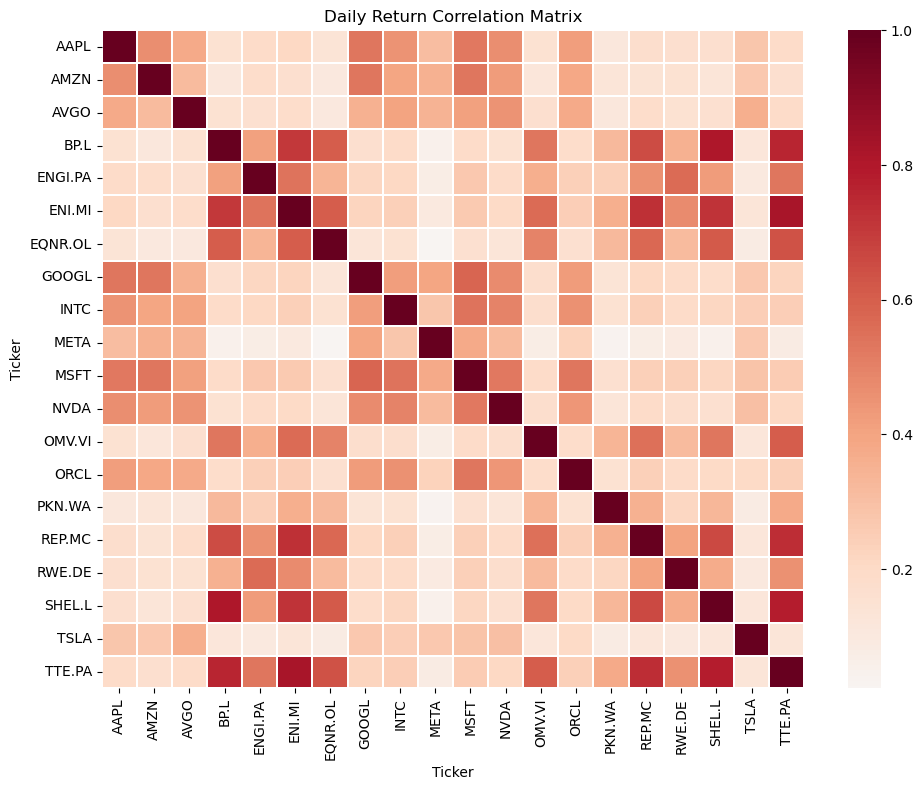

In [24]:
# Daily returns and correlation

rets = data.pct_change().dropna()
corr = rets.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap="RdBu_r", center=0, annot=False, linewidths=0.2)
plt.title("Daily Return Correlation Matrix")
plt.tight_layout()
plt.show()

In [26]:
# Top-level summary by ticker
summary = pd.DataFrame({
    'start_price': data.iloc[0],
    'end_price': data.iloc[-1],
    'total_return_%': ((data.iloc[-1] / data.iloc[0]) - 1) * 100,
    'annualized_vol_%': rets.std() * np.sqrt(252) * 100,
    'annualized_return_%': rets.mean() * 252 * 100,
})
pd.set_option('display.float_format', '{:.2f}'.format)
display(summary.round(2))

,start_price,end_price,total_return_%,annualized_vol_%,annualized_return_%
Ticker,,,,,
AAPL,1.13,226.79,19966.73,31.80,29.92
AMZN,2.23,230.33,10247.26,37.24,28.62
AVGO,1.62,369.57,22741.16,32.73,30.81
BP.L,508.00,423.75,-16.58,28.40,3.18
ENGI.PA,19.68,17.93,-8.89,27.68,3.37
ENI.MI,18.31,14.96,-18.31,27.10,2.74
EQNR.OL,94.25,243.40,158.25,30.32,9.06
GOOGL,5.07,239.17,4614.73,29.66,22.44
INTC,23.07,24.77,7.37,33.64,6.03


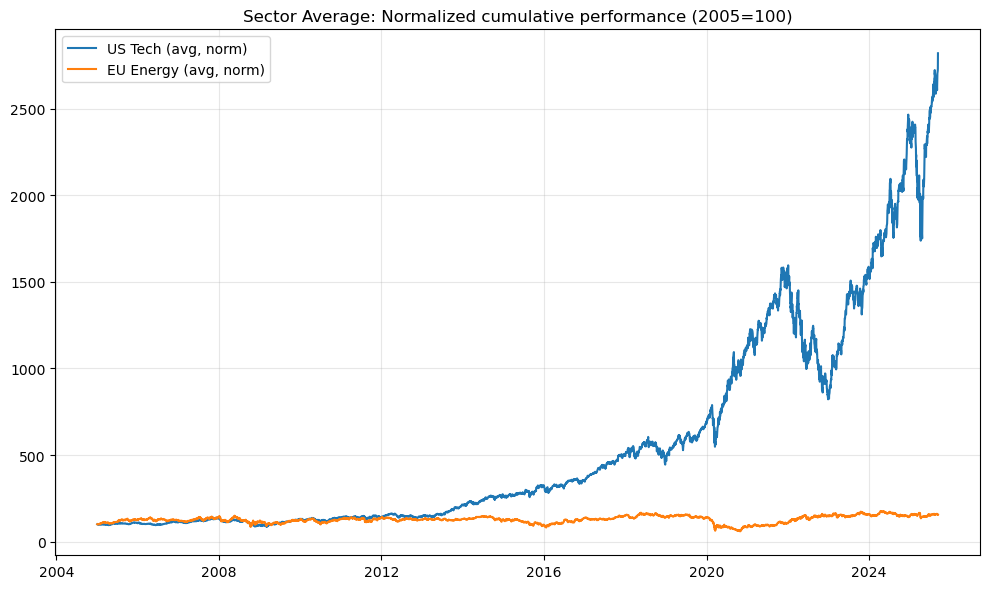

In [27]:
# Compare sector cumulative returns

df_sector = pd.DataFrame(index=data.index)
df_sector['US_Tech'] = data[us_tech].mean(axis=1) / data[us_tech].iloc[0].mean() * 100
df_sector['EU_Energy'] = data[eu_energy].mean(axis=1) / data[eu_energy].iloc[0].mean() * 100

plt.figure(figsize=(10,6))
plt.plot(df_sector.index, df_sector['US_Tech'], label='US Tech (avg, norm)')
plt.plot(df_sector.index, df_sector['EU_Energy'], label='EU Energy (avg, norm)')
plt.title('Sector Average: Normalized cumulative performance (2005=100)')
plt.legend(); plt.grid(alpha=0.3); plt.tight_layout()
plt.show()

In [29]:
# Pairwise highest/lowest correlations

flat = corr.unstack().dropna()
flat = flat[flat.index.get_level_values(0) != flat.index.get_level_values(1)]
flat = flat.sort_values()
print("\nMost negatively correlated pair:\n", flat.head(1))
print("\nMost positively correlated pair:\n", flat.tail(1))


Most negatively correlated pair:
 Ticker   Ticker
EQNR.OL  META     0.02
dtype: float64

Most positively correlated pair:
 Ticker  Ticker
TTE.PA  ENI.MI   0.82
dtype: float64


In [60]:
# Configurable Strategy Parameters
initial_cash = 200_000.0
max_positions = 5                # max concurrent positions
position_fraction = 0.18         # fraction of current portfolio to allocate per new position
rsi_period = 14
bb_period = 20
bb_k = 2
rsi_entry = 30
rsi_exit = 50
holding_limit_days = 60          # force exit after X days (safety)
commission_per_trade = 1.0       # flat commission per trade
slippage_pct = 0.001             # 0.1% slippage on entry/exit (approx)

In [59]:
# RSI and Bollinger Bands

def compute_rsi(series, period=14):
    delta = series.diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)
    # Wilder's EMA smoothing
    avg_gain = gain.ewm(alpha=1/period, adjust=False, min_periods=period).mean()
    avg_loss = loss.ewm(alpha=1/period, adjust=False, min_periods=period).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def compute_bbands(series, period=20, k=2):
    sma = series.rolling(window=period).mean()
    std = series.rolling(window=period).std()
    upper = sma + k * std
    lower = sma - k * std
    return sma, upper, lower

In [ ]:
# Build per-ticker DataFrames with indicators (use existing 'data')
available_tickers = list(data.columns)
print("Tickers available:", available_tickers)

# Prepare per-ticker dictionary with indicators and signals
data_dict = {}
for t in available_tickers:
    df = pd.DataFrame(index=data.index)
    df['Close'] = data[t]
    df['RSI'] = compute_rsi(df['Close'], period=rsi_period)
    df['SMA20'], df['BB_up'], df['BB_low'] = compute_bbands(df['Close'], period=bb_period, k=bb_k)
    # Signals
    df['rsi_signal'] = ((df['RSI'] > rsi_entry) & (df['RSI'].shift(1) < rsi_entry)).astype(int)
    df['bb_signal'] = ((df['Close'] > df['BB_low']) & (df['Close'].shift(1) < df['BB_low'].shift(1))).astype(int)
    df['buy_signal'] = ((df['rsi_signal'] == 1) | (df['bb_signal'] == 1)).astype(int)
    df['exit_signal'] = ((df['RSI'] > rsi_exit) | (df['Close'] > df['SMA20'])).astype(int)
    data_dict[t] = df


AttributeError: 'DataFrame' object has no attribute 'raw'

In [58]:
def run_backtest(ind_data, initial_cash=200_000, max_positions=5, 
                 position_fraction=0.18, holding_limit_days=60, 
                 commission=1.0, slippage=0.001):
    """
    Manual backtest loop for mean reversion strategy.
    ind_data: output of add_indicators (long-format DataFrame with signals).
    """
    tickers = ind_data['Ticker'].unique()
    dates = ind_data.index.unique()

    cash = initial_cash
    positions = {t: 0 for t in tickers}
    entry_price = {t: None for t in tickers}
    entry_date  = {t: None for t in tickers}
    portfolio_values = []
    trades = []

    for date in dates:
        daily = ind_data.loc[date]

        # === 1. Compute total portfolio value ===
        pv_positions = 0
        for t in tickers:
            if positions[t] > 0:
                px = daily.loc[daily['Ticker']==t, 'Close'].values[0]
                pv_positions += positions[t] * px
        total_value = cash + pv_positions
        portfolio_values.append({'date': date, 'total': total_value})

        # === 2. Exits ===
        for t in tickers:
            if positions[t] > 0:
                row = daily[daily['Ticker']==t]
                if row['exit_signal'].values[0] == 1 or (date - entry_date[t]).days >= holding_limit_days:
                    exit_p = row['Close'].values[0] * (1 - slippage)
                    qty = positions[t]
                    proceeds = qty*exit_p - commission
                    cash += proceeds
                    pnl = (exit_p - entry_price[t]) * qty - commission
                    trades.append({
                        'ticker': t, 'entry_date': entry_date[t], 'exit_date': date,
                        'entry_price': entry_price[t], 'exit_price': exit_p,
                        'qty': qty, 'pnl': pnl
                    })
                    positions[t] = 0
                    entry_price[t] = None
                    entry_date[t] = None

        # === 3. Entries ===
        open_count = sum(1 for v in positions.values() if v > 0)
        for t in tickers:
            row = daily[daily['Ticker']==t]
            if positions[t] == 0 and open_count < max_positions:
                if row['buy_signal'].values[0] == 1:
                    alloc = min(position_fraction * total_value, cash)
                    entry_p = row['Close'].values[0] * (1 + slippage)
                    qty = math.floor((alloc - commission) / entry_p)
                    if qty > 0:
                        cost = qty * entry_p + commission
                        cash -= cost
                        positions[t] = qty
                        entry_price[t] = entry_p
                        entry_date[t] = date
                        open_count += 1

    pv_df = pd.DataFrame(portfolio_values).set_index('date')
    return pv_df['total'], pd.DataFrame(trades)
